### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2


### Дисциплина: Методы машинного обучения

## Москва 2022
***

### Вариант № 8

# 1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets.


### Сherry blossom, также известный как японская вишня или сакура, является цветком многих деревьев рода Prunus или Prunus subg.

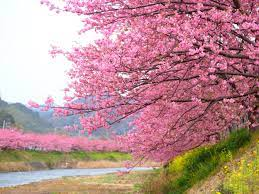

In [1]:
import tensorflow_datasets as tfds
data = tfds.as_dataframe(tfds.load("cherry_blossoms", split='train'))
data.head()

,doy,temp,temp_lower,temp_upper,year
0,NaN,6.46,4.76,8.16,1300
1,105.0,5.63,4.90,6.37,1638
2,109.0,5.81,4.68,6.95,1347
3,104.0,5.70,4.87,6.53,1187
4,107.0,6.20,5.31,7.09,1617


In [2]:
data = data.dropna()

# 2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.


Лабораторная работа 2 – Вариант 8
1. Набор данных: cherry_blossoms
2. Независимая переменная: temp
3. Зависимая переменная: temp_upper
4. Визуализация для независимой переменной – эмпирическая плотность распределения
5. Визуализация для зависимой переменной – столбчатая диаграмма
6. Показатель качества регрессии – MAE (mean absolute error)


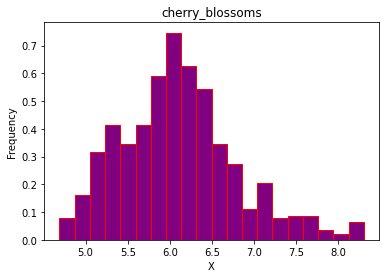

In [3]:
import matplotlib.pyplot as plt
plt.title("cherry_blossoms") # заголовок
plt.xlabel("X") # ось абсцисс
plt.ylabel("Y") # ось ординат
data['temp'].plot.hist(color='purple', edgecolor='red', bins=20, density=True);

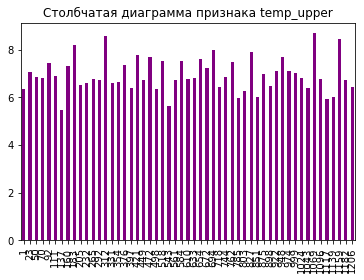

In [4]:
data[::15]['temp_upper'].plot.bar(title='Столбчатая диаграмма признака temp_upper', color='purple');

# 3. Постройте парную линейную регрессию при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества R^2 двух подходов.


In [5]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [6]:
import tensorflow as tf
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['temp'] , data['temp_upper'], test_size=0.2)
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)
model.fit(X_train,y_train, epochs=100)
predict_NN = model.predict(X_test)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3248 - mean_absolute_error: 2.3248
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5256 - mean_absolute_error: 0.5256
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3208 - mean_absolute_error: 0.3208
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3311 - mean_absolute_error: 0.3311
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2946 - mean_absolute_error: 0.2946
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2659 - mean_absolute_error: 0.2659
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2666 - mean_absolute_error: 0.2666
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2807 - mean_absolute_error: 0.2807
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2556 - mean_absolute_error: 0.2556
Epoch 10/1

In [7]:
import numpy as np
reg = SimpleLinReg()
reg.fit(X_train,y_train)
predict_SR = reg.predict(X_test)

In [8]:

from sklearn.metrics import r2_score
import pandas as pd
pd.DataFrame({'SimpleRegression':[r2_score(predict_SR,y_test)]})

,SimpleRegression
0,0.731559


In [9]:
pd.DataFrame({'NeuralNetwork':[r2_score(predict_NN,y_test)]})

,NeuralNetwork
0,0.652853


# 4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.


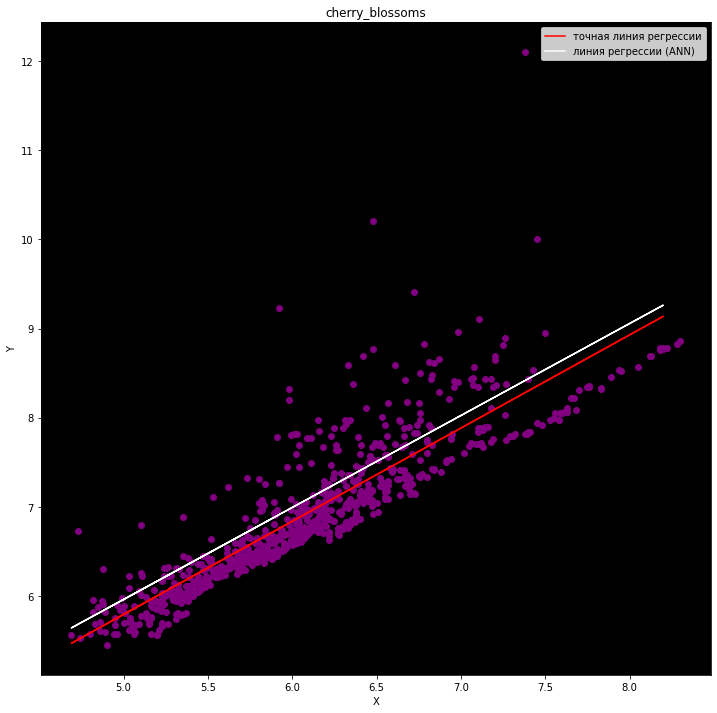

In [10]:
import numpy as np
plt.figure(figsize=(12,12)).patch.set_facecolor('white')
ax = plt.axes()
ax.set_facecolor('black')
plt.title("cherry_blossoms") # заголовок
plt.xlabel("X") # ось абсцисс
plt.ylabel("Y") # ось ординат
plt.scatter(data['temp'] , data['temp_upper'], c='purple')
plt.plot(X_test, predict_SR, c='red', label='точная линия регрессии')
plt.plot(X_test, predict_NN, c='white', label='линия регрессии (ANN)')
plt.legend();

# 5. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака) и постройте диаграмму рассеяния для нормализованного независимого признака и зависимого признака, , подписывая оси и рисунок.


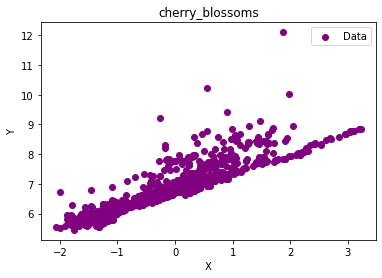

In [11]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(data.drop(['temp_upper'],axis=1))
normalizer(data.drop(['temp_upper'],axis=1)).numpy()
plt.scatter(normalizer(data.drop(['temp_upper'],axis=1)).numpy()[:, 1:2], data['temp_upper'], label='Data', color='purple')
plt.title("cherry_blossoms") # заголовок
plt.xlabel("X") # ось абсцисс
plt.ylabel("Y") # ось ординат
plt.legend()

# 6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

# линейной регрессии,
# гребневой регрессии (L2),
# лассо регрессии (L1),



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['temp_upper'],axis=1) , data['temp_upper'])
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
_1 = linear_model.fit(X_train, y_train, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [13]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,  
                          kernel_regularizer=tf.keras.regularizers.L1())
])
l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
_2 = l1_model.fit(
    X_train, y_train, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [14]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,  
                          kernel_regularizer=tf.keras.regularizers.L2())
])
l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
_3 = l2_model.fit(
    X_train, y_train, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

# 7. Определите среди построенных моделей модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании.

__Cредняя абсолютная ошибка__ (Mean Absolute Error, MAE) не так сильно штрафует за большие отклонения по сравнению со среднеквадратичным, и поэтому менее чувствительна к выбросам.

$MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|$

MAE output is non-negative floating point. The best value is 0.0.



In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(l2_model.predict(X_test),y_test)

0.04764056

In [16]:
mean_absolute_error(l1_model.predict(X_test),y_test)

0.0613188

In [17]:
mean_absolute_error(linear_model.predict(X_test),y_test)

0.05505735

# linear_model - best MAE

# 8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).


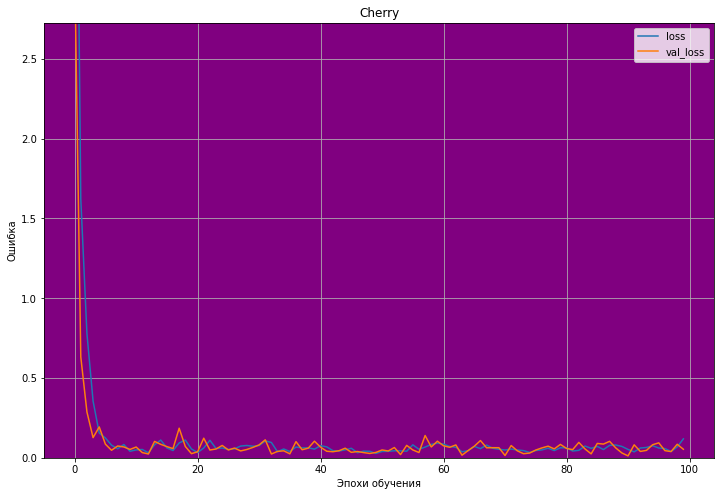

In [18]:
def plot_loss(history):
  plt.figure(figsize=(12,8)).patch.set_facecolor('white')
  ax = plt.axes()
  ax.set_facecolor('purple')
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])*0.5])
  plt.xlabel('Эпохи обучения')
  plt.title('Cherry')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)
plot_loss(_1)

# 9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [19]:
data.columns

Index(['doy', 'temp', 'temp_lower', 'temp_upper', 'year'], dtype='object')

In [20]:
data[['doy', 'temp_lower', 'year']] = data[['doy', 'temp_lower', 'year']].median()
data

,doy,temp,temp_lower,temp_upper,year
1,105.0,5.63,5.25,6.37,1563.0
2,105.0,5.81,5.25,6.95,1563.0
3,105.0,5.70,5.25,6.53,1563.0
4,105.0,6.20,5.25,7.09,1563.0
7,105.0,5.38,5.25,5.98,1563.0
...,...,...,...,...,...
1209,105.0,4.85,5.25,5.88,1563.0
1210,105.0,6.45,5.25,7.10,1563.0
1211,105.0,5.71,5.25,6.44,1563.0
1212,105.0,6.68,5.25,7.27,1563.0


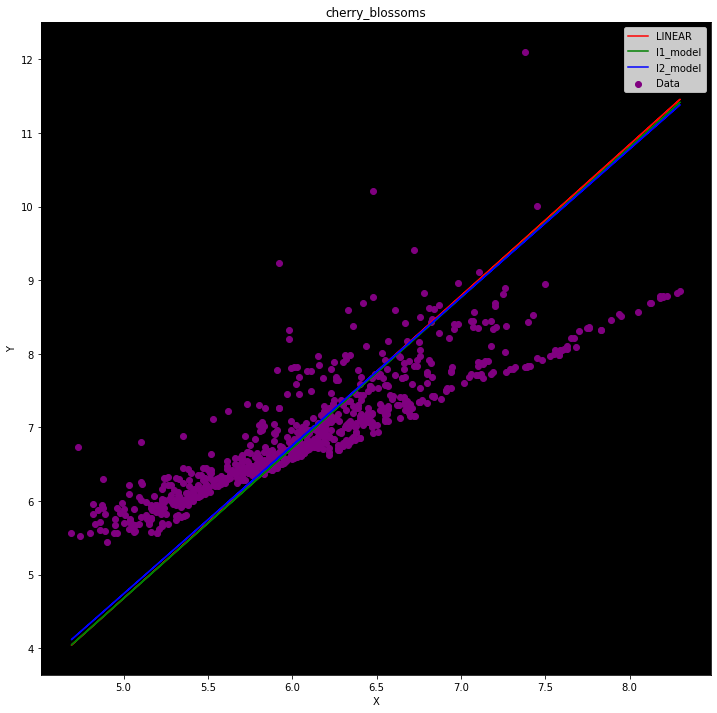

In [26]:
plt.figure(figsize=(12,12)).patch.set_facecolor('white')
ax = plt.axes()
ax.set_facecolor('black')
plt.title("cherry_blossoms") # заголовок
plt.xlabel("X") # ось абсцисс
plt.ylabel("Y") # ось ординат
plt.scatter(data['temp'] , data['temp_upper'], c='purple', label='Data')
plt.plot(data['temp'], linear_model.predict(data.drop(['temp_upper'],axis=1)), c='r', label='LINEAR')
plt.plot(data['temp'], l1_model.predict(data.drop(['temp_upper'],axis=1)), c='g', label='l1_model')
plt.plot(data['temp'], l2_model.predict(data.drop(['temp_upper'],axis=1)), c='blue', label='l2_model')
plt.legend();